If you are not using the `Assignments` tab on the course JupyterHub server to read this notebook, read [Activating the assignments tab](https://github.com/lcdm-uiuc/info490-sp17/blob/master/help/act_assign_tab.md).

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

5. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

# Problem 10.2. Graph Analysis.

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from nose.tools import assert_equal, assert_almost_equal, assert_is_instance, assert_true, assert_false
from numpy.testing import assert_array_equal, assert_array_almost_equal

## Florentine Families Social Network

In this assignment, we'll be looking at the social network of the [Florentine Families](https://en.wikipedia.org/wiki/Category:Families_of_Florence).

In [2]:
g=nx.florentine_families_graph()

- Use `networkx.draw()` to draw the social network of the Florentine families.

    ![](./images/FF_graph.png)

In [3]:
def draw_graph(graph):
    '''
    Draws the social network of the Florentine families.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots()
    nx.draw_networkx(graph, ax = ax, with_labels = True, node_color = "lightblue", node_size = 600, font_size = 10, )
    plt.axis('off')
    
    return ax

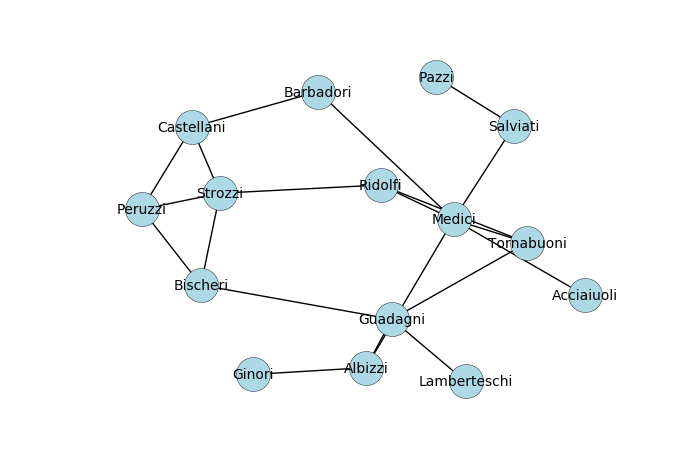

In [4]:
ax1 = draw_graph(g)
plt.show()

In [5]:
assert_is_instance(ax1, mpl.axes.Axes)
assert_equal(ax1.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax1.collections[1].get_segments()), len(g.edges()))

## Measures of centrality

- Compute the degree centrality of each node (using [`degree_centrality()`](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality) ) , the [betweenness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html) and [closeness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality).

In [6]:
def get_centrality(graph):
    '''
    Computes the degree of each node.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.

    Returns
    -------
    A tuple of dicts
    '''
    
    # YOUR CODE HERE
    degree = nx.degree_centrality(graph)
    betweenness = nx.betweenness_centrality(graph)
    closeness = nx.closeness_centrality(graph)
    
    return degree, betweenness, closeness

In [7]:
degree, betweenness, closeness = get_centrality(g)
print('Node \t Degree \t Betweenness \t Closeness')
for node in degree:
    print('{0:} \t {1:7f} \t {2:7f} \t {3:7f}'.format(node, degree[node], betweenness[node], closeness[node]))

Node 	 Degree 	 Betweenness 	 Closeness
Medici 	 0.428571 	 0.521978 	 0.560000
Pazzi 	 0.071429 	 0.000000 	 0.285714
Castellani 	 0.214286 	 0.054945 	 0.388889
Salviati 	 0.142857 	 0.142857 	 0.388889
Ginori 	 0.071429 	 0.000000 	 0.333333
Barbadori 	 0.142857 	 0.093407 	 0.437500
Ridolfi 	 0.214286 	 0.113553 	 0.500000
Strozzi 	 0.285714 	 0.102564 	 0.437500
Peruzzi 	 0.214286 	 0.021978 	 0.368421
Acciaiuoli 	 0.071429 	 0.000000 	 0.368421
Tornabuoni 	 0.214286 	 0.091575 	 0.482759
Albizzi 	 0.214286 	 0.212454 	 0.482759
Bischeri 	 0.214286 	 0.104396 	 0.400000
Lamberteschi 	 0.071429 	 0.000000 	 0.325581
Guadagni 	 0.285714 	 0.254579 	 0.466667


In [8]:
assert_is_instance(degree, dict)
assert_equal(sorted(list(degree.keys())), ['Acciaiuoli', 'Albizzi', 'Barbadori', 'Bischeri', 'Castellani', 
                                           'Ginori', 'Guadagni', 'Lamberteschi', 'Medici', 'Pazzi', 'Peruzzi', 
                                           'Ridolfi', 'Salviati', 'Strozzi', 'Tornabuoni'])
assert_almost_equal(degree['Ginori'], 0.071429,3)
assert_almost_equal(betweenness['Ridolfi'], 0.113553,3)
assert_almost_equal(closeness['Albizzi'], 0.482759,3)

We see that two families ('Medici' and 'Guadagni') have the highest betweennness values. High betweenness values signify "brokerage" roles in the network. To visualize this,

- Color each node according to whether it is a friend of the 'Medici' family node or the 'Guadagni' family node. 

If someone is a friend of both families, classify the node as a friend of the 'Guadagni' family.

![](./images/friends_graph.png)

We could draw the nodes, edges, and labels individually using `draw_networkx_nodes()`, `draw_networkx_edges()`, and `draw_networkx_labels()`. But I think it's simpler to draw all nodes, edges, and labels by using `draw()`, and then overwrite the nodes with different colors by using `draw_networkx_nodes()`.

In the following code cell,

- Use `networkx.draw()` to draw a graph,
- Use `networkx.draw_networkx_nodes()` to make the friends of node 'Medici' different colors, and
- Use `networkx.draw_networkx_nodes()` to make the friends of node 'Guadagni' different colors.

It is important to draw the graph in this specific order to pass the unit tests.

In [9]:
def draw_graph_friends(graph):
    '''
    Draws the social network of the Florentine families,
    but uses different colors for friends of node 'Medici' and node 'Guadagni'.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots()
    # mark the positon of the graph
    position = nx.spring_layout(graph)
    # Use different plot markers
    nx.draw(graph, pos = position, ax = ax, node_color = 'lightblue', 
            node_size = 600, font_size = 10, with_labels = True)
    nx.draw_networkx_nodes(graph, pos = position, nodelist = graph.neighbors('Medici') + ['Medici'], 
                           ax = ax, node_color='mistyrose', node_size = 600, font_size = 10)
    nx.draw_networkx_nodes(graph,pos=position, nodelist=graph.neighbors('Guadagni') + ['Guadagni'], 
                           ax = ax, node_color='palegreen', node_size = 600, font_size = 10)
    
    return ax

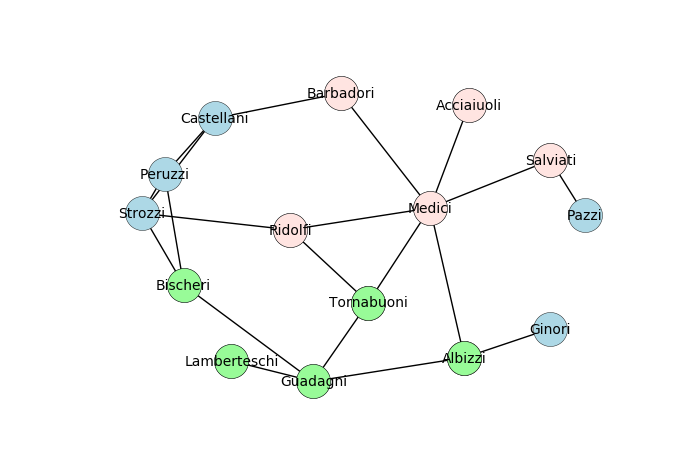

In [10]:
ax2 = draw_graph_friends(g)
plt.show()

In [11]:
assert_is_instance(ax2, mpl.axes.Axes)
assert_equal(ax2.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax2.collections[1].get_segments()), len(g.edges()))
assert_equal(len(ax2.collections[2].get_offsets()), 7)
assert_equal(len(ax2.collections[3].get_offsets()), 5)
assert_false(np.all(ax2.collections[2].get_facecolor() == ax2.collections[3].get_facecolor()))

## Cliques
Identify the cliques in which a given node is participating.

In [12]:
def find_node_cliques(graph,node):
    '''
    Returns the cliques from the graph in which `node` is participating.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    List of cliques containing `node`.
    '''
    
    # YOUR CODE HERE
    cliques = []
    for clique in nx.find_cliques(g):
        # check if clique contains node
        if node in clique:
            cliques.append(clique)
    
    return cliques

In [13]:
cliques1 = find_node_cliques(g,'Medici')

print("Cliques of which the Medici family node is a part of:")
print(60*"-")
for clique in cliques1:
    print(clique)

cliques2 = find_node_cliques(g,'Guadagni')

print("\nCliques of which the Guadagni family node is a part of:")
print(60*"-")
for clique in cliques2:
    print(clique)

Cliques of which the Medici family node is a part of:
------------------------------------------------------------
['Medici', 'Albizzi']
['Medici', 'Ridolfi', 'Tornabuoni']
['Medici', 'Salviati']
['Medici', 'Acciaiuoli']
['Medici', 'Barbadori']

Cliques of which the Guadagni family node is a part of:
------------------------------------------------------------
['Bischeri', 'Guadagni']
['Lamberteschi', 'Guadagni']
['Guadagni', 'Tornabuoni']
['Guadagni', 'Albizzi']


In [14]:
assert_is_instance(cliques1, list)
assert_equal(len(cliques1),5)
assert_true((['Medici', 'Acciaiuoli'] in cliques1) or (['Acciaiuoli', 'Medici'] in cliques1))
assert_true((['Medici', 'Salviati'] in cliques1) or (['Salviati', 'Medici'] in cliques1))
assert_is_instance(cliques2, list)
assert_equal(len(cliques2),4)
assert_true((['Guadagni', 'Albizzi'] in cliques2) or (['Albizzi', 'Guadagni'] in cliques2))
assert_true((['Guadagni', 'Bischeri'] in cliques2) or (['Bischeri', 'Guadagni'] in cliques2))